# Notes from Christopher Bishop's <b>Pattern Recognition and Machine Learning</b>

## Some notes I decided to take in notebook form, including code examples, visualizations, and equations and derviations

In [1]:
%config Completer.use_jedi = False

## Polynomial Curve Fitting

### Generating Training Data

2022-02-01 19:52:26.396014: W external/org_tensorflow/tensorflow/compiler/xla/service/platform_util.cc:205] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_UNKNOWN: unknown error


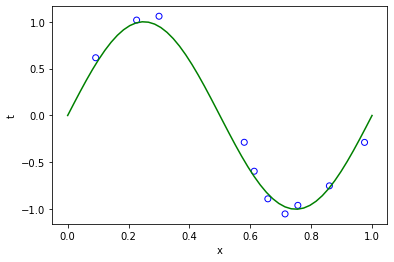

In [2]:
import jax.numpy as np
import math
import matplotlib.pyplot as plt
from jax import jit, grad, vmap, value_and_grad
from jax import random

#Number of points
N = 10
# Generate JAX andom key
key = random.PRNGKey(5)

#Create features
x = random.uniform(key, shape=(N,), minval=0.0, maxval=1)
#Create Labels
y = np.sin(2*math.pi*x)
#Add noise
y = y+random.permutation(key, random.normal(key, shape=(N,)) * 0.1)

#Create sin(2pi*x) function
t_x = np.linspace(0,1)
t_y = np.sin(2*math.pi*t_x)

#Plot
plt.scatter(x, y, facecolors = 'none', edgecolors = 'b')
plt.plot(t_x, t_y,'g-')
plt.xlabel("x")
plt.ylabel("t")
plt.show()

### Fitting Polynomials

finished plotting degree 9 polynomial


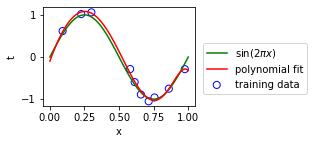

In [4]:
def polynomial(x, weights):
    total = 0
    for j, w in enumerate(weights):
        total += w * x**j
    return total

jit_poly = jit(polynomial)

def SSE(weights, features, targets):
    error = 0
    for x, t in zip(features, targets):
        error += (jit_poly(x, weights) - t)**2
    return 0.5 * error

jit_sse = jit(SSE)

def RMSerror(weights, features, targets):
    return (2*jit_sse(weights, features, targets)/len(targets))**0.5

jit_rmse = jit(RMSerror)

rmse_grad = grad(jit_rmse)
step = .05

W_out = []
M = [9]
for i, m in enumerate(M):
    plt.subplot(2, 2, i + 1)
    W = random.normal(key, shape=(m+1,))

    epochs = 100000
    for i in range(epochs):
        W -= step * rmse_grad(W, x, y)
        
    W_out.append([w for w in W])

    plt.scatter(x, y, facecolors = 'none', edgecolors = 'b', s=50, label='training data')
    plt.plot(t_x, t_y,'g-', label = '$\sin(2\pi x)$')
    plt.plot(np.linspace(0,1,100), [polynomial(i, W) for i in np.linspace(0,1,100)], 'r-', label=f'polynomial fit')
    plt.xlabel("x")
    plt.ylabel("t")
    print(f'finished plotting degree {m} polynomial')
plt.legend(bbox_to_anchor=(1.05,0.64), loc=2, borderaxespad=0.)
plt.show()

In [10]:
W_out

[[DeviceArray(-0.21230003, dtype=float32)],
 [DeviceArray(1.1159121, dtype=float32),
  DeviceArray(-2.299864, dtype=float32)],
 [DeviceArray(1.4952445, dtype=float32),
  DeviceArray(-2.8316264, dtype=float32),
  DeviceArray(-3.6430528, dtype=float32),
  DeviceArray(4.532626, dtype=float32)],
 [DeviceArray(0.913505, dtype=float32),
  DeviceArray(0.7594674, dtype=float32),
  DeviceArray(-4.4762034, dtype=float32),
  DeviceArray(-1.5462804, dtype=float32),
  DeviceArray(-0.3038877, dtype=float32),
  DeviceArray(1.0573285, dtype=float32),
  DeviceArray(1.8345873, dtype=float32),
  DeviceArray(0.16711967, dtype=float32),
  DeviceArray(2.0681076, dtype=float32),
  DeviceArray(-0.28372458, dtype=float32)]]